In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and organize books data
books = pd.read_json('../data/raw/goodreads_books_comics_graphic.json', lines=True)

In [3]:
books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,...,,,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454,1,42749946,The Switchblade Mamma,The Switchblade Mamma
1,2205073346,2,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",,false,3.94,,...,1,,2016,https://www.goodreads.com/book/show/30128855-c...,https://images.gr-assets.com/books/1462644346m...,30128855,16,50558228,Cruelle,Cruelle
2,,5,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",,false,4.28,,...,,,2012,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...
3,,1,[],US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",B06XKGGSB7,true,4.05,B06XKGGSB7,...,,,,https://www.goodreads.com/book/show/35452242-b...,https://s.gr-assets.com/assets/nophoto/book/11...,35452242,6,54276229,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...
4,0930289765,6,"[266759, 1096220]",US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",,false,4.06,,...,11,,1997,https://www.goodreads.com/book/show/707611.Sup...,https://images.gr-assets.com/books/1307838888m...,707611,51,693886,"Superman Archives, Vol. 2","Superman Archives, Vol. 2"


In [4]:
books.shape

(89411, 29)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89411 entries, 0 to 89410
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  89411 non-null  object 
 1   text_reviews_count    89411 non-null  int64  
 2   series                89411 non-null  object 
 3   country_code          89411 non-null  object 
 4   language_code         89411 non-null  object 
 5   popular_shelves       89411 non-null  object 
 6   asin                  89411 non-null  object 
 7   is_ebook              89411 non-null  object 
 8   average_rating        89411 non-null  float64
 9   kindle_asin           89411 non-null  object 
 10  similar_books         89411 non-null  object 
 11  description           89411 non-null  object 
 12  format                89411 non-null  object 
 13  link                  89411 non-null  object 
 14  authors               89411 non-null  object 
 15  publisher          

In [6]:
# What languages are there?
books.language_code.unique()

array(['', 'fre', 'eng', 'en-US', 'kor', 'jpn', 'spa', 'zho', 'ita',
       'en-GB', 'nor', 'ind', 'cze', 'ben', 'swe', 'ger', 'nl', 'por',
       'en-CA', 'gre', 'fin', 'rum', 'bos', 'msa', 'tur', 'per', 'pol',
       'vie', 'hin', 'mul', 'dan', 'scr', 'tha', 'fil', 'rus', 'bul',
       'srp', 'ara', 'nno', 'lav', 'heb', 'pes', 'cat', 'tgl', 'hun',
       'nob', 'est', '--', 'ach', 'kat', 'ira', 'ukr', 'inh', 'slv',
       'lit', 'sco', 'tel', 'slo', 'vai', 'eus', 'abk', 'ine', 'isl',
       'glg', 'nld', 'wak', 'iku', 'fiu', 'aze', 'afr', 'dut', 'en'],
      dtype=object)

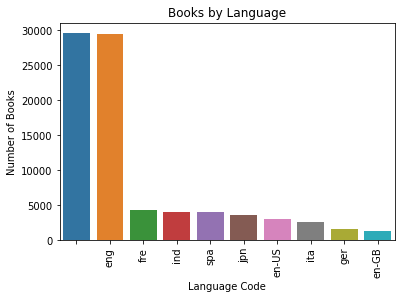

In [7]:
# plot top 10 most common languages
sns.barplot(x=books.language_code.value_counts().index[:10],
           y=books.language_code.value_counts()[:10])
plt.ylabel('Number of Books')
plt.xlabel('Language Code')
plt.title("Books by Language")
plt.xticks(rotation=90)
plt.savefig('../figures/languages.png')

In [8]:
# Keep only the books in english
books = books[books['language_code'].isin(['eng','en-US','en-GB','en-CA'])]

# Now that only english, what different countries are there?
print(books.country_code.value_counts())

US    33925
Name: country_code, dtype: int64


In [9]:
books.shape

(33925, 29)

<b>Notes on columns:</b>
There are a bunch of columns that are unnecessary:
* isbn/asin columns: these are forms of identification. will use book_id as identifier as that's what is used in columns like 'series' and 'smiliar_books'
* publication month/day: seems like overkill to go down to this level of detail with publication date. publication year may be relevant...example if someone likes a lot of recent ones
* link/url/image_url: don't need images
* language_code: don't need this anymore
* country_code: these are all "US" so no value in keeping

In [10]:
books = books.drop(['isbn','language_code','asin','kindle_asin','work_id','image_url','link',
                    'url','isbn13', 'publication_month','publication_day','country_code'],axis=1)

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 2 to 89410
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_reviews_count    33925 non-null  int64  
 1   series                33925 non-null  object 
 2   popular_shelves       33925 non-null  object 
 3   is_ebook              33925 non-null  object 
 4   average_rating        33925 non-null  float64
 5   similar_books         33925 non-null  object 
 6   description           33925 non-null  object 
 7   format                33925 non-null  object 
 8   authors               33925 non-null  object 
 9   publisher             33925 non-null  object 
 10  num_pages             33925 non-null  object 
 11  edition_information   33925 non-null  object 
 12  publication_year      33925 non-null  object 
 13  book_id               33925 non-null  int64  
 14  ratings_count         33925 non-null  int64  
 15  title              

<b>Columns for further exploration:</b>
For these columns it isn't exactly clear whether they're helpful to our purposes or not. Need to get a better understanding of them:
* 'book_id' seems like it would make a good index
* 'publisher' could this be relevant?
* 'edition_information' could this be relevant?
* 'is_ebook' seems like it could be combined easily with 'format'
* check 'title' and 'title_without_series' - could these be broken into 'title' and 'series'? if so, is series irrelevent given there is a separate 'series' column that list other books in the series?
* 'authors'needs further exploration
* 'series' not quite sure how this ties to other books
* 'popular_shelves' needs further exploration

In [12]:
# set 'book_id' as index
books.set_index('book_id',inplace=True)

In [13]:
# publisher column
print(books.publisher.unique())
print(books.publisher.value_counts())

['Hachette Partworks Ltd.' '' 'DC Comics' ...
 'Henry Holt and Company, Inc.' 'Crabtree Publishing Company' 'Vintage']
                               7373
Marvel                         3017
DC Comics                      2984
VIZ Media LLC                  1942
Image Comics                   1750
                               ... 
Summit Publishing Co., Inc.       1
FST PULP                          1
G2COMIX.inc                       1
Hyperion                          1
Troisieme Vague Lomard            1
Name: publisher, Length: 2849, dtype: int64


Publisher seems like it could potentially be relevant at first glance. If someone likes a lot of Marvel comics, for example, they would likely be more inclined to like another Marvel comic in the future.

But this information is probably encapsulated better at the title level - i.e. the fact that someone likes a Marvel Captain America comic could be gathered in more detail by the title "Captain America" rather than the publisher "Marvel"

In [14]:
books.drop('publisher',axis=1, inplace=True)

In [15]:
# edition_information
books.edition_information.value_counts()

                                               30589
Trade                                            487
Premiere                                         218
First                                            180
Deluxe Edition                                   173
                                               ...  
Third edition                                      1
Graphic Edition                                    1
First ever fully-authorized digital edition        1
(Swan (Graphic Novels))                            1
50th Anniversary Edition                           1
Name: edition_information, Length: 714, dtype: int64

'edition_information' is mostly blank. The remainder are frequently one-offs as well.

In [16]:
books.drop('edition_information',axis=1, inplace=True)

In [17]:
# Examine 'is_ebook' and 'format' - they're giving the same information. 
# Is that information necessary to keep? If so, how can we combine?
print(books.is_ebook.value_counts())
print(books.format.value_counts())

false    27960
true      5965
Name: is_ebook, dtype: int64
Paperback                        17789
                                  8370
Hardcover                         4834
ebook                             1191
Kindle Edition                     650
                                 ...  
Single issue comic                   1
Yaoi                                 1
Manga Online                         1
Digital comic                        1
Graphic Novel Trade Hardcover        1
Name: format, Length: 147, dtype: int64


In [18]:
books.format.unique()

array(['Hardcover', '', 'Paperback', 'Kindle Edition', 'ebook',
       'Comic Book', 'Comic', 'Digital Comic', 'Unknown Binding',
       'Mass Market Paperback', 'Nook', 'Library Binding', 'Webtoon',
       'Comics', 'Book', 'Audible Audio', 'Hardcover with dust jacket',
       'Custom Handmade Binding', 'Spiral-bound', 'free manga scanlation',
       'Trade Paperback', 'FC', 'Slipcased Hardcover', 'Online',
       'webtoon', 'Board book', 'Paperback Manga', 'Unbound',
       'Single Issue', 'comic', 'paperback', 'One-Shot Comic',
       'Graphic Novels', 'Comixology Edition', 'Digital', 'Comic book',
       'The Walking Dead - Single Issues #146', 'Over-sized Soft-cover',
       'Audiobook', 'Paperback - Manga', 'Issue', 'Flexiback', 'Audio CD',
       'The Walking Dead - Single Issues #135', 'Graphic Novel',
       'Webcomic/Manhua', 'Print Comic', 'Online Comic', 'PDF',
       'Magazine', 'CD-ROM', 'staple-bound', 'Webcomic', 'Prestige',
       'Leather Bound', 'The Walking Dead - S

In [19]:
books.drop(['is_ebook','format'], axis=1, inplace=True)

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 13571772 to 23363286
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_reviews_count    33925 non-null  int64  
 1   series                33925 non-null  object 
 2   popular_shelves       33925 non-null  object 
 3   average_rating        33925 non-null  float64
 4   similar_books         33925 non-null  object 
 5   description           33925 non-null  object 
 6   authors               33925 non-null  object 
 7   num_pages             33925 non-null  object 
 8   publication_year      33925 non-null  object 
 9   ratings_count         33925 non-null  int64  
 10  title                 33925 non-null  object 
 11  title_without_series  33925 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.4+ MB


<b>Title columns:</b>
What's the difference between title and title with series? There is also a separate series column. Does that encapsulate any add'l info in the title with series column?

In [21]:
books.head()

,text_reviews_count,series,popular_shelves,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,title_without_series
book_id,,,,,,,,,,,,
13571772,5,"[246830, 362583, 362581, 623032]","[{'count': '493', 'name': 'to-read'}, {'count'...",4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",146,2012,51,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...
35452242,1,[],"[{'count': '222', 'name': 'to-read'}, {'count'...",4.05,[],The fight for Jason Delgado's life and soul be...,"[{'author_id': '16209952', 'role': ''}, {'auth...",,,6,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...
707611,6,"[266759, 1096220]","[{'count': '20', 'name': 'to-read'}, {'count':...",4.06,[],These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",272,1997,51,"Superman Archives, Vol. 2","Superman Archives, Vol. 2"
27036536,9,[834955],"[{'count': '47', 'name': 'to-read'}, {'count':...",4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",224,2016,39,"War Stories, Volume 3","War Stories, Volume 3"
11827783,26,[774390],"[{'count': '104', 'name': 'to-read'}, {'count'...",3.16,"[6651573, 8835785, 15060759, 9466897, 8423991,...",Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",144,2011,114,Sherlock Holmes: Year One,Sherlock Holmes: Year One


Based on the first 5 rows they seem identical. Let's look at a bigger sample.

In [22]:
books.sample(25)

,text_reviews_count,series,popular_shelves,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title,title_without_series
book_id,,,,,,,,,,,,
10301780,1,[335099],"[{'count': '7', 'name': 'to-read'}, {'count': ...",4.00,[],The conclusion of the landmark existentialist ...,"[{'author_id': '94673', 'role': ''}]",48,2010,11,Big Questions #15: The Sweet Taste of Victory,Big Questions #15: The Sweet Taste of Victory
8506663,1,[],"[{'count': '4', 'name': 'to-read'}, {'count': ...",4.27,[],,"[{'author_id': '106888', 'role': ''}]",,,11,Valmiki,Valmiki
33785137,1,[],"[{'count': '5', 'name': 'comics'}, {'count': '...",3.63,[],,"[{'author_id': '12757', 'role': ''}]",20,2016,2,Deathstroke (2016-) #7,Deathstroke (2016-) #7
29633670,57,[],"[{'count': '265', 'name': 'to-read'}, {'count'...",3.70,[],"With stunning narrative skill, this compelling...","[{'author_id': '13930968', 'role': 'Illustrati...",197,2016,283,How to Survive in the North,How to Survive in the North
16157772,7,[],"[{'count': '9', 'name': 'to-read'}, {'count': ...",3.38,[],"A dog-faced man, a disappearing woman, a headl...","[{'author_id': '588556', 'role': ''}]",176,2012,24,The Black Well,The Black Well
941808,5,"[194244, 568884, 1123349]","[{'count': '56', 'name': 'comics'}, {'count': ...",3.71,"[107125, 107115, 626613, 941804, 107100, 16060...",,"[{'author_id': '28712', 'role': ''}, {'author_...",,,54,"Batman, Judge Dredd: Judgement on Gotham","Batman, Judge Dredd: Judgement on Gotham"
1121114,12,"[217992, 475269]","[{'count': '267', 'name': 'manga'}, {'count': ...",4.35,"[1019917, 1600493, 1044500, 30205, 484130]","A set of twins barge in our heroes, one which ...","[{'author_id': '60631', 'role': ''}]",192,2005,766,"Saiyuki, Vol. 7","Saiyuki, Vol. 7"
295030,18,[760710],"[{'count': '90', 'name': 'to-read'}, {'count':...",4.32,"[918866, 13162601, 844422, 624705, 1109208, 62...",,"[{'author_id': '170309', 'role': ''}]",,,144,2001 Nights: The Death Trilogy Overture (2001 ...,2001 Nights: The Death Trilogy Overture (2001 ...
35013789,1,[],"[{'count': '6', 'name': 'comics'}, {'count': '...",3.78,[],"""The Rise of Aqualad"" finale! Out of the depth...","[{'author_id': '215907', 'role': ''}]",32,2017,1,Teen Titans (2016-) #7,Teen Titans (2016-) #7


In [23]:
books.title.value_counts()

Watchmen                                                11
Batman: The Dark Knight Returns                          9
Batman: Year One                                         8
Fun Home: A Family Tragicomic                            7
Kingdom Come                                             7
                                                        ..
Fables #55                                               1
Woodstock: Master of Disguise                            1
X-Men: Original Sin                                      1
Kanan - The Last Padawan #5                              1
Science Comics: Plagues: The Microscopic Battlefield     1
Name: title, Length: 31523, dtype: int64

In [24]:
books.title_without_series.value_counts()

Watchmen                                                11
Batman: The Dark Knight Returns                          9
Batman: Year One                                         8
Fun Home: A Family Tragicomic                            7
Kingdom Come                                             7
                                                        ..
Fables #55                                               1
Woodstock: Master of Disguise                            1
X-Men: Original Sin                                      1
Kanan - The Last Padawan #5                              1
Science Comics: Plagues: The Microscopic Battlefield     1
Name: title_without_series, Length: 31523, dtype: int64

In [25]:
# These seem basically identical. Will drop the title_without_series.
books.drop('title_without_series',inplace=True,axis=1)

<b>Authors</b>
It looks like authors column is a list of dictionaries where each dictionary in the list contains author_id and role for each of the authors on the book.

In [26]:
books.head()

,text_reviews_count,series,popular_shelves,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,,,
13571772,5,"[246830, 362583, 362581, 623032]","[{'count': '493', 'name': 'to-read'}, {'count'...",4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",146,2012,51,Captain America: Winter Soldier (The Ultimate ...
35452242,1,[],"[{'count': '222', 'name': 'to-read'}, {'count'...",4.05,[],The fight for Jason Delgado's life and soul be...,"[{'author_id': '16209952', 'role': ''}, {'auth...",,,6,Bounty Hunter 4/3: My Life in Combat from Mari...
707611,6,"[266759, 1096220]","[{'count': '20', 'name': 'to-read'}, {'count':...",4.06,[],These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",272,1997,51,"Superman Archives, Vol. 2"
27036536,9,[834955],"[{'count': '47', 'name': 'to-read'}, {'count':...",4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",224,2016,39,"War Stories, Volume 3"
11827783,26,[774390],"[{'count': '104', 'name': 'to-read'}, {'count'...",3.16,"[6651573, 8835785, 15060759, 9466897, 8423991,...",Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",144,2011,114,Sherlock Holmes: Year One


My goal is to extract the authors and roles for the authors from each row. I can see if role is relevant...it looks like it's blank based on the head. If so, can discard that information and just keep a list of the authors.

In [27]:
# get a list of all the authors
authors = [[x.get('author_id') for x in d] for d in books.authors]

In [28]:
# Check that it worked
print(authors[:10])
print(len(authors))
print(len(books.authors))

[['37450'], ['16209952', '853385'], ['81563', '89537'], ['14965', '3188368', '131836', '7507599'], ['61231', '4980321'], ['294649'], ['311098'], ['12772', '12771'], ['130617'], ['5340891', '5340892', '7224524']]
33925
33925


In [29]:
# do the same for all the roles
roles = [[x.get('role') for x in d] for d in books.authors]

In [30]:
print(len(roles))
print(roles[:10])

33925
[[''], ['', ''], ['', 'Illustrator'], ['', 'Illustrations', 'Illustrations', ''], ['', 'Illustrator'], [''], [''], ['', 'Illustrator'], [''], ['', 'Illustrator', 'doujinshi circle']]


In [31]:
r = pd.Series(roles)
r.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                  10639
[, Illustrator]                                                                                                                                                      3874
[, ]                                                                                                                                                                 2121
[, Illustrator, Illustrator]                                                                                                                                         1426
[, Translator]                                                                                                                                                        725
                                                                                                                                                      

The roles information seems largely missing and/or irrelevant, so will leave that out. But authors could potentially add value.

In [32]:
books['authors'] = authors

In [33]:
books.head()

,text_reviews_count,series,popular_shelves,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,,,
13571772,5,"[246830, 362583, 362581, 623032]","[{'count': '493', 'name': 'to-read'}, {'count'...",4.28,"[13590139, 105963, 207585, 10503130, 4645370, ...",The questions plaguing Captain America's dream...,[37450],146,2012,51,Captain America: Winter Soldier (The Ultimate ...
35452242,1,[],"[{'count': '222', 'name': 'to-read'}, {'count'...",4.05,[],The fight for Jason Delgado's life and soul be...,"[16209952, 853385]",,,6,Bounty Hunter 4/3: My Life in Combat from Mari...
707611,6,"[266759, 1096220]","[{'count': '20', 'name': 'to-read'}, {'count':...",4.06,[],These are the stories that catapulted Superman...,"[81563, 89537]",272,1997,51,"Superman Archives, Vol. 2"
27036536,9,[834955],"[{'count': '47', 'name': 'to-read'}, {'count':...",4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"[14965, 3188368, 131836, 7507599]",224,2016,39,"War Stories, Volume 3"
11827783,26,[774390],"[{'count': '104', 'name': 'to-read'}, {'count'...",3.16,"[6651573, 8835785, 15060759, 9466897, 8423991,...",Sir Arthur Conan Doyle's dauntless detective r...,"[61231, 4980321]",144,2011,114,Sherlock Holmes: Year One


<b>Series column:</b> It seems like this is a list of other books in the same series as the book at hand. Want to confirm.

After exploring documentation from the studies using this data. It appears these refer to a separate "series" dataset, not other books in the same series.

That additional dataset is outside the scope of this project, so this column can be dropped.

In [34]:
books.drop('series',inplace=True, axis=1)

<b>Popular Shelves:</b>
This information will be gathered from the additional "reviews" dataset I'm incorporating. Can drop this column.

In [35]:
books.drop('popular_shelves', inplace=True, axis=1)

In [36]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 13571772 to 23363286
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  33925 non-null  int64  
 1   average_rating      33925 non-null  float64
 2   similar_books       33925 non-null  object 
 3   description         33925 non-null  object 
 4   authors             33925 non-null  object 
 5   num_pages           33925 non-null  object 
 6   publication_year    33925 non-null  object 
 7   ratings_count       33925 non-null  int64  
 8   title               33925 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.6+ MB


In [37]:
books.to_csv('../data/interim/books_comics_cleaned.csv')

In [25]:
# Load and clean up reviews data
reviews = pd.read_json('../data/raw/goodreads_reviews_comics_graphic.json', lines=True)

In [26]:
reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,,0,0
1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Wed Aug 10 00:00:00 -0700 2016,0,0
2,bafc2d50014200cda7cb2b6acd60cd73,29847729,a75309355f8662caaa5e2c92ab693d3f,4,"A very quick introduction, this is coming out ...",Thu Apr 21 07:44:00 -0700 2016,Thu Apr 21 07:59:28 -0700 2016,Thu Apr 21 07:59:28 -0700 2016,Thu Apr 21 00:00:00 -0700 2016,0,0
3,bafc2d50014200cda7cb2b6acd60cd73,18454118,c3cc5a3e1d6b6c9cf1c044f306c8e752,5,I've been waiting so long for this. I first st...,Mon Mar 03 17:45:56 -0800 2014,Mon Mar 03 17:54:11 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,1,0
4,bafc2d50014200cda7cb2b6acd60cd73,2239435,cc444be37ab0a42bfb4dd818cb5edd10,4,The only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,,0,0


In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       542338 non-null  object
 1   book_id       542338 non-null  int64 
 2   review_id     542338 non-null  object
 3   rating        542338 non-null  int64 
 4   review_text   542338 non-null  object
 5   date_added    542338 non-null  object
 6   date_updated  542338 non-null  object
 7   read_at       542338 non-null  object
 8   started_at    542338 non-null  object
 9   n_votes       542338 non-null  int64 
 10  n_comments    542338 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 45.5+ MB


In [28]:
reviews.drop(['date_updated','read_at','started_at','n_votes','n_comments','date_added'], inplace=True, axis=1)

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      542338 non-null  object
 1   book_id      542338 non-null  int64 
 2   review_id    542338 non-null  object
 3   rating       542338 non-null  int64 
 4   review_text  542338 non-null  object
dtypes: int64(2), object(3)
memory usage: 20.7+ MB


In [30]:
# set 'review_id' as index
reviews.set_index('review_id',inplace=True)

In [31]:
reviews.to_csv('../data/interim/reviews_comics_cleaned.csv')

<b>Note - Interactions Data:</b><br>
This dataset also included an "interactions" data file that I thought would be helpful. I loaded in the interactions data, but that actually is redundent given the reviews/books datasets I've loaded. It just shows how users have interacted with different books (i.e. if they've reviewed or not). 

In looking at that data, I would just drop any combinations where the user hasn't read the book, because that provides no information. That means I would only keep the reviews, which is excatly what I have in the reviews dataframe I've got.

In [33]:
# Compress my data output files so they're under Github 100MB limit
import gzip
import shutil

with open('../data/interim/reviews_comics_cleaned.csv', 'rb') as f_in:
    with gzip.open('../data/interim/reviews_comics_cleaned.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [34]:
with open('../data/interim/books_comics_cleaned.csv', 'rb') as f_in:
    with gzip.open('../data/interim/books_comics_cleaned.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)